In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [10]:
data=pd.read_csv("/content/Housing[1].csv")

In [11]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
data['mainroad']=data['mainroad'].apply({'yes':1,'no':0}.get)
data['guestroom']=data['guestroom'].apply({'yes':1,'no':0}.get)
data['basement']=data['basement'].apply({'yes':1,'no':0}.get)
data['hotwaterheating']=data['hotwaterheating'].apply({'yes':1,'no':0}.get)
data['airconditioning']=data['airconditioning'].apply({'yes':1,'no':0}.get)
data['prefarea']=data['prefarea'].apply({'yes':1,'no':0}.get)
data['furnishingstatus']=data['furnishingstatus'].apply({'semi-furnished':1,'unfurnished':0,'furnished':2}.get)

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [19]:
x=data.drop(['price'],axis=1)
y=data['price']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


In [22]:
LR.fit(x_train,y_train)

LinearRegression()

In [24]:
LR.score(x,y)

0.6765944327493001

In [25]:
pre=LR.predict(x_test)

<Axes: xlabel='furnishingstatus', ylabel='price'>

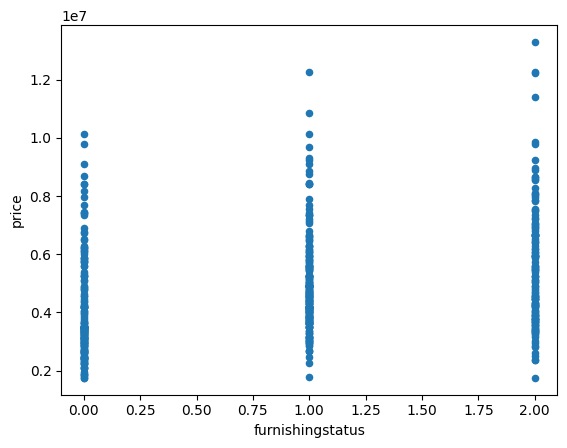

In [41]:
data.plot.scatter(x='furnishingstatus',y='price')


<Axes: xlabel='area', ylabel='price'>

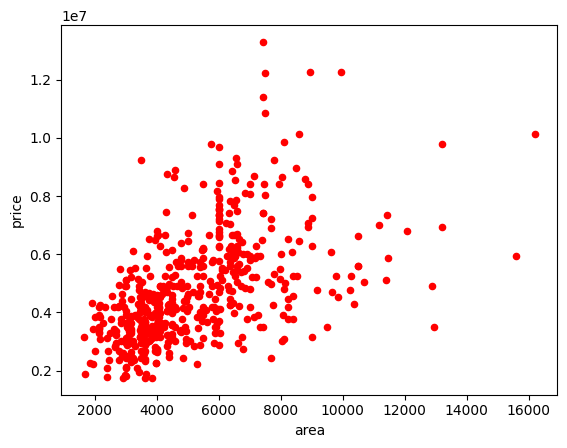

In [42]:
data.plot.scatter(x='area',y='price', color='r')

<Axes: xlabel='mainroad', ylabel='price'>

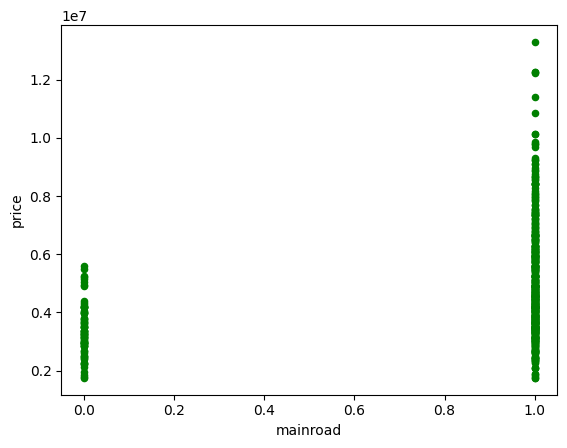

In [46]:
data.plot.scatter(x='mainroad',y='price', color='g')

<Axes: xlabel='area', ylabel='furnishingstatus'>

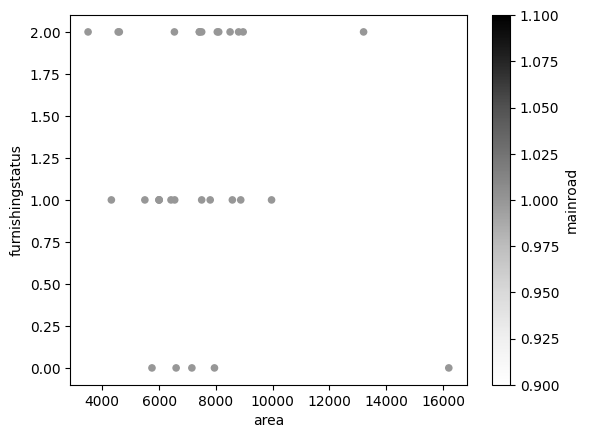

In [49]:
data.iloc[0:30].plot.scatter(x='area',y='furnishingstatus', c='mainroad')

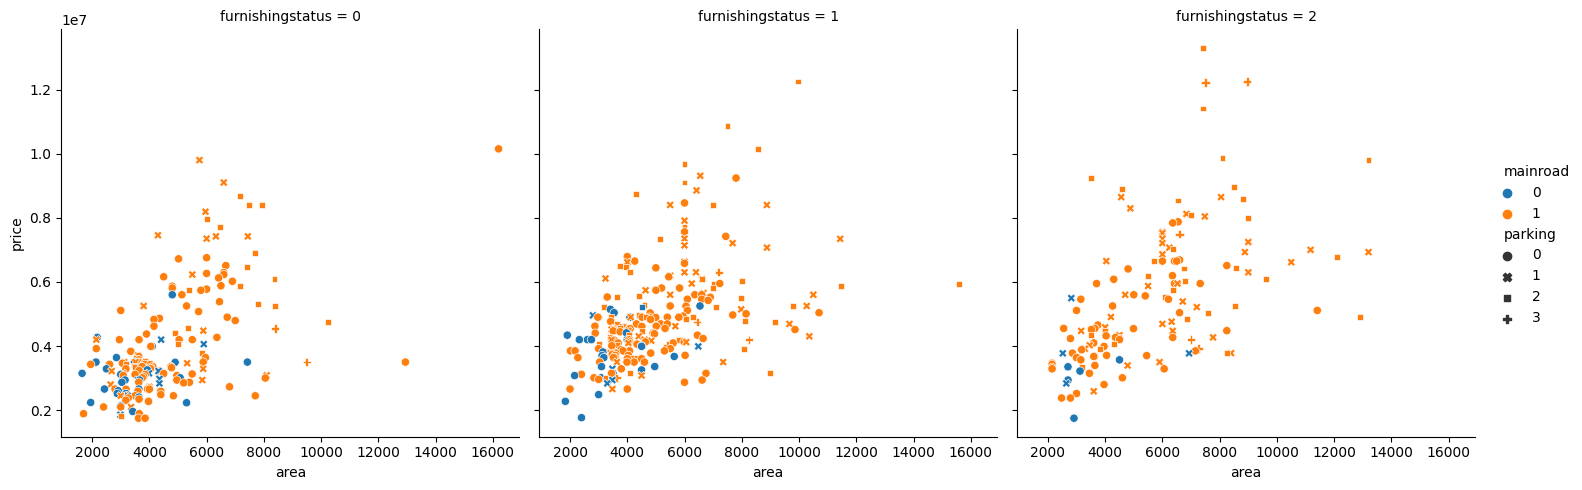

In [51]:
snr.relplot(x='area',y='price', hue='mainroad', style='parking', col='furnishingstatus', data=data)

<Axes: >

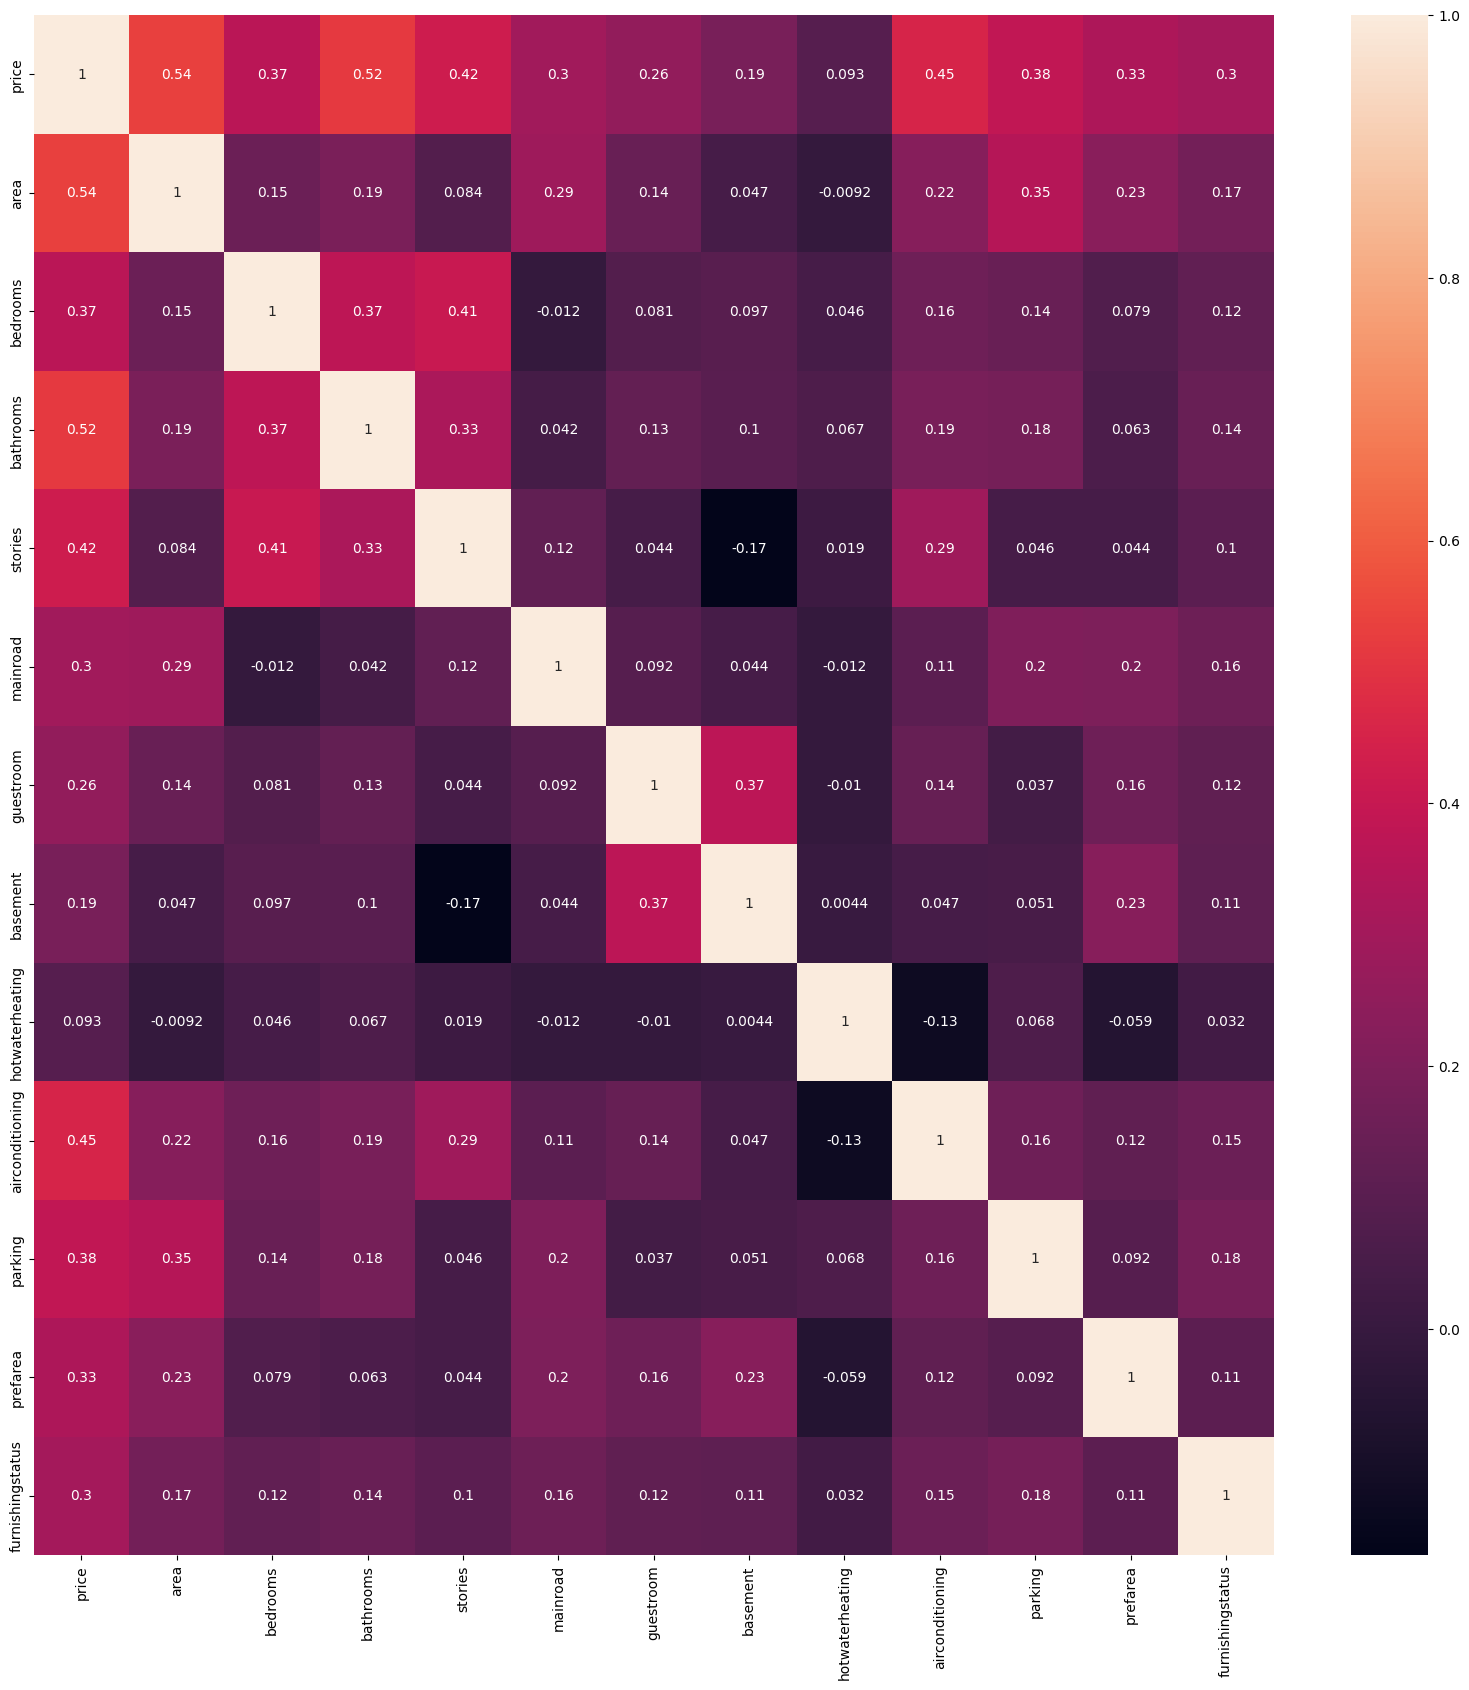

In [54]:
#heatmap - will show the corelation between different features
plt.figure(figsize=(20,20))
snr.heatmap(data.corr(),annot=True)